ADF Statistic: -1.717017
p-value: 0.422367
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
ADF Statistic: -2.829267
p-value: 0.054213
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


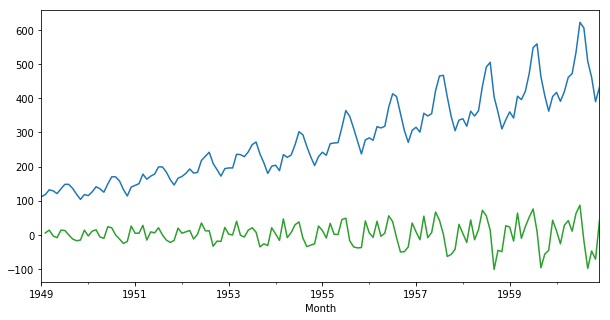

In [2]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt  # major lib for smoothening
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

np.seterr(divide = 'ignore') 


dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

dataset = pd.read_csv('C:/Users/DELL/Desktop/JT/AirPassengers.csv',parse_dates=['Month'],
                     index_col='Month',date_parser=dateparse)

ds = dataset['#Passengers']
ds.head()
diff_data=dataset['#Passengers']

ds.plot(kind="line",figsize=(10,5))
my_data=dataset['#Passengers']

my_data = np.log(ds)


# In[87]:


my_data.hist()


# In[4]:


#Dickey Fuller Test


from statsmodels.tsa.stattools import adfuller
result = adfuller(my_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
#p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
#p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


# In[88]:


dataset['#Passengers_diff'] = dataset['#Passengers'] - dataset['#Passengers'].shift(1)
kdata = dataset['#Passengers_diff'].dropna()
#print(kdata)
dataset['#Passengers_diff'].dropna().plot()
#my_data.hist()
#ds.plot(kind="line",figsize=(10,5))


from statsmodels.tsa.stattools import adfuller
#X = series.values
result = adfuller(kdata)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
    
#p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
#p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

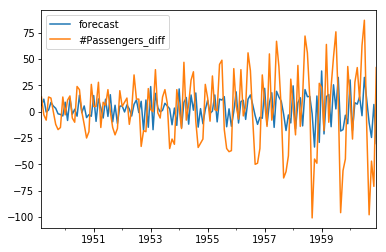

                             ARIMA Model Results                              
Dep. Variable:     D.#Passengers_diff   No. Observations:                  142
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -691.954
Method:                       css-mle   S.D. of innovations             31.067
Date:                Sat, 19 Oct 2019   AIC                           1393.908
Time:                        15:01:14   BIC                           1408.688
Sample:                    03-01-1949   HQIC                          1399.914
                         - 12-01-1960                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0034      0.080      0.043      0.966      -0.152       0.159
ar.L1.D.#Passengers_diff    -0.4709      0.116     -4.048      0.000      -0.699      -0.

In [3]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(kdata, order=(1,1,2))
model_fit = model.fit(disp=0)



model_fit.plot_predict(dynamic=False)
plt.show()

print(model_fit.summary())


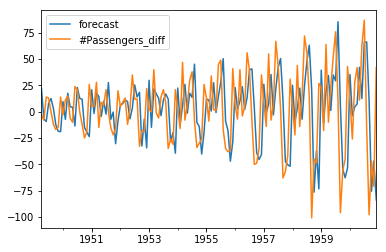

                              ARIMA Model Results                              
Dep. Variable:     D2.#Passengers_diff   No. Observations:                  141
Model:                  ARIMA(2, 2, 2)   Log Likelihood                -713.612
Method:                        css-mle   S.D. of innovations             37.383
Date:                 Sat, 19 Oct 2019   AIC                           1439.223
Time:                         15:01:37   BIC                           1456.916
Sample:                     04-01-1949   HQIC                          1446.413
                          - 12-01-1960                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0097      0.062      0.158      0.875      -0.111       0.131
ar.L1.D2.#Passengers_diff    -1.0127      0.101    -10.032      0.000      -1.

In [4]:

from statsmodels.tsa.arima_model import ARIMA
model1 = ARIMA(kdata, order=(2,2,2))
model_fit1 = model1.fit(disp=0)
model_fit1.plot_predict(dynamic=False)
plt.show()
print(model_fit1.summary())

In [5]:
from statsmodels.tsa.stattools import acf

# Create Training and Test


diff_data = np.log(ds)
train = diff_data[:120]
test = diff_data[120:]
#print(diff_data)

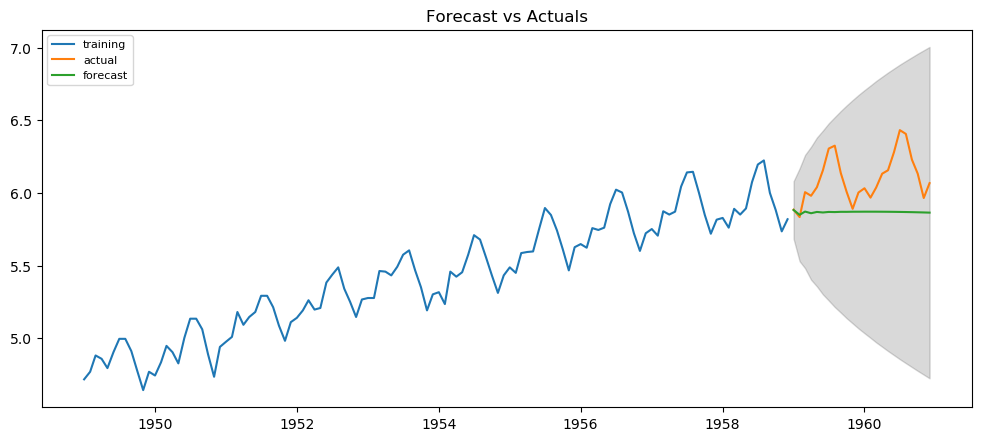

In [6]:

# Build Model
 
model = ARIMA(train, order=(2, 2, 2))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(24, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [7]:
mape = np.mean(np.abs(fc - test.values)/np.abs(test.values))
print(mape)

me = np.mean(fc - test.values)
print(me)

rmse = np.mean((fc - test.values)**2)**.5
print(rmse)


0.03756977589299082
-0.2317919847538724
0.280809887882777
